In [2]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [3]:
morpho_example_wide = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Wide.csv")

Wide = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_wide,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    format = "wide"
)

print(Wide.df)
print(Wide.format)
print(Wide.chemical)
print(Wide.plate)
print(Wide.well)
print(Wide.concentration)
print(Wide.endpoint)
print(Wide.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
wide
chemical.id
plate.id
well
conc
endpoint
value


In [4]:
morpho_example_long = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_long,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    endpoint = "endpoint",
    value = "value"
)

print(Long.df)
print(Long.format)
print(Long.chemical)
print(Long.plate)
print(Long.well)
print(Long.concentration)
print(Long.endpoint)
print(Long.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
long
chemical.id
plate.id
well
conc
endpoint
value


## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [5]:
endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], "DAVID":["MO24", "DP24"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"Test":["MO24"], "DAVID":["DP24"]})

Long.df

DAVID is already an existing endpoint


,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,Test,1.0
860,3863,10.0,20637,H09,Test,1.0
861,3863,10.0,20637,H10,Test,0.0
862,3863,10.0,20637,H11,Test,0.0


In [6]:
Long.report_combination

{'Test': ['MO24'],
 'DAVID': ['MO24', 'DP24'],
 'ANY24': ['MO24', 'DP24', 'SM24', 'NC24']}

In [7]:
Long.df[Long.df[Long.endpoint] == "DAVID"]

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,DAVID,0.0
1,3757,0.0,19877,H02,DAVID,0.0
2,3757,0.0,19877,H03,DAVID,0.0
3,3757,0.0,19877,H04,DAVID,0.0
4,3757,0.0,19877,H05,DAVID,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


In [8]:
# Add new endpoint
Wide.combine_and_create_new_endpoints(endpoint_dict)

Wide.df

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


#### Binary Class: Set wells to NA

In [9]:
Long.set_well_to_na(endpoint_name = "DNC_", endpoint_value = 1)

# All of these wells should be NA 
Long.df[Long.df["bmdrc.Well.ID"] == "3757 21.9 19877 B01"]


,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
216,3757,21.9,19877,B01,MO24,NaN,3757 21.9 19877 B01
1080,3757,21.9,19877,B01,DP24,NaN,3757 21.9 19877 B01
1944,3757,21.9,19877,B01,SM24,NaN,3757 21.9 19877 B01
2808,3757,21.9,19877,B01,NC24,NaN,3757 21.9 19877 B01
3672,3757,21.9,19877,B01,MORT,NaN,3757 21.9 19877 B01
4536,3757,21.9,19877,B01,YSE_,NaN,3757 21.9 19877 B01
5400,3757,21.9,19877,B01,AXIS,NaN,3757 21.9 19877 B01
6264,3757,21.9,19877,B01,EYE_,NaN,3757 21.9 19877 B01
7128,3757,21.9,19877,B01,SNOU,NaN,3757 21.9 19877 B01
7992,3757,21.9,19877,B01,JAW_,NaN,3757 21.9 19877 B01


In [10]:
Long.set_well_to_na(endpoint_name = "MORT", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

# All but DP24, MO24, SM24, and MORT should be np.nan
Long.df[Long.df["bmdrc.Well.ID"] == "3757 2.65 19890 G04"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
63,3757,2.65,19890,G04,MO24,0.0,3757 2.65 19890 G04
927,3757,2.65,19890,G04,DP24,1.0,3757 2.65 19890 G04
1791,3757,2.65,19890,G04,SM24,0.0,3757 2.65 19890 G04
2655,3757,2.65,19890,G04,NC24,NaN,3757 2.65 19890 G04
3519,3757,2.65,19890,G04,MORT,1.0,3757 2.65 19890 G04
4383,3757,2.65,19890,G04,YSE_,NaN,3757 2.65 19890 G04
5247,3757,2.65,19890,G04,AXIS,NaN,3757 2.65 19890 G04
6111,3757,2.65,19890,G04,EYE_,NaN,3757 2.65 19890 G04
6975,3757,2.65,19890,G04,SNOU,NaN,3757 2.65 19890 G04
7839,3757,2.65,19890,G04,JAW_,NaN,3757 2.65 19890 G04


In [11]:
Long.report_well_na

[[['DNC_'], [1], None], [['MORT'], [1], ['DP24', 'MO24', 'SM24', 'MORT']]]

#### Binary Class: Remove Endpoint

In [12]:
# Should trigger an error
#Long.remove_endpoints(["DNC_", "CATS"])

In [13]:
# DNC_ should not be removed
Long.df[Long.df[Long.endpoint] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
19008,3757,0.0,19877,H01,DNC_,0.0,3757 0.0 19877 H01
19009,3757,0.0,19877,H02,DNC_,0.0,3757 0.0 19877 H02
19010,3757,0.0,19877,H03,DNC_,0.0,3757 0.0 19877 H03
19011,3757,0.0,19877,H04,DNC_,0.0,3757 0.0 19877 H04
19012,3757,0.0,19877,H05,DNC_,0.0,3757 0.0 19877 H05
...,...,...,...,...,...,...,...
19867,3863,10.0,20637,H08,DNC_,0.0,3863 10.0 20637 H08
19868,3863,10.0,20637,H09,DNC_,0.0,3863 10.0 20637 H09
19869,3863,10.0,20637,H10,DNC_,0.0,3863 10.0 20637 H10
19870,3863,10.0,20637,H11,DNC_,0.0,3863 10.0 20637 H11


In [14]:
Long.remove_endpoints("DNC_")

Long.df[Long.df["endpoint"] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [15]:
Long.report_endpoint_removal

['DNC_']

In [16]:
Long.remove_endpoints(["DAVID", "Test"])

Long.df[Long.df["endpoint"].isin(["DAVID", "Test"])]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [17]:
Long.report_endpoint_removal

['DNC_', 'DAVID', 'Test']

## Module 3: Filtering Modules

#### Negative Control Filter

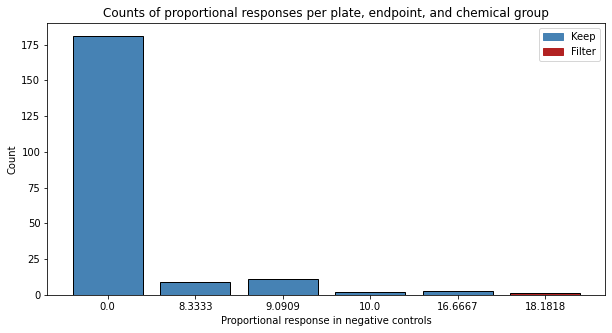

In [18]:
Long.filter_negative_control(percentage = 18, apply = False, diagnostic_plot = True)

In [19]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,181,Keep
1,8.333333,9,Keep
2,9.090909,11,Keep
3,10.000000,2,Keep
4,16.666667,3,Keep
5,18.181818,1,Filter


In [20]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 18, apply = True)
Long.plate_groups

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
1,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
2,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Keep,
3,3757,0.0,19877,CFIN,12,12,0.0,3757 19877 CFIN,3757 CFIN,Keep,
4,3757,0.0,19877,CIRC,12,12,0.0,3757 19877 CIRC,3757 CIRC,Keep,
...,...,...,...,...,...,...,...,...,...,...,...
1651,3863,10.0,20637,SOMI,12,6,0.0,3863 20637 SOMI,3863 SOMI,Keep,
1652,3863,10.0,20637,SWIM,12,6,0.0,3863 20637 SWIM,3863 SWIM,Keep,
1653,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Keep,
1654,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Keep,


#### Minimum Concentration Filter

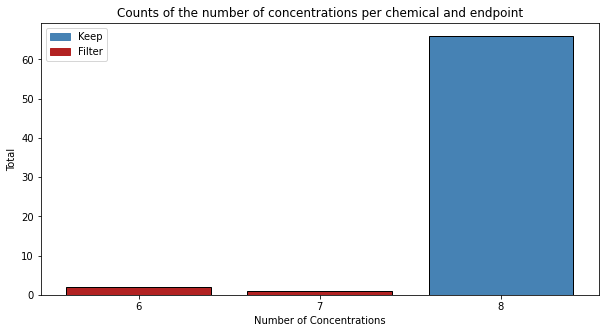

In [21]:
Long.filter_min_concentration(count = 8, apply = False, diagnostic_plot = True)

In [22]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
1,6,2,Filter
2,7,1,Filter
0,8,66,Keep


In [23]:
# Apply the minimum concentration filter
Long.filter_min_concentration(count = 8, apply = True)
Long.plate_groups[Long.plate_groups["bmdrc.Endpoint.ID"] == "3863 ANY24"]

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
1104,3863,0.000,20312,ANY24,12,12,1.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1127,3863,0.000,20627,ANY24,12,11,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1150,3863,0.000,20637,ANY24,12,12,1.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1173,3863,0.100,20312,ANY24,12,12,3.0,3863 20312 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1196,3863,0.100,20627,ANY24,12,9,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1219,3863,0.100,20637,ANY24,12,11,3.0,3863 20637 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1242,3863,0.254,20312,ANY24,12,12,2.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1265,3863,0.254,20627,ANY24,12,11,3.0,3863 20627 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1288,3863,0.254,20637,ANY24,12,12,2.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1311,3863,0.645,20312,ANY24,12,12,0.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter


#### Correlation Score Filter

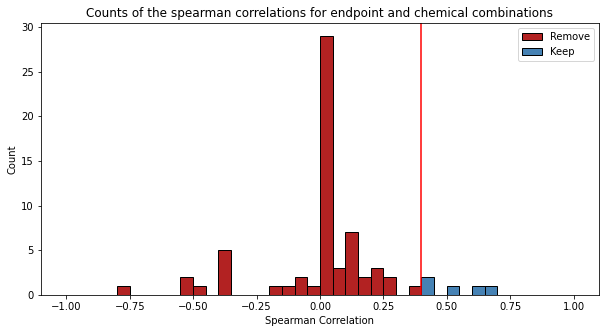

In [24]:
Long.filter_correlation_score(score = 0.4, diagnostic_plot = True)

In [25]:
Long.filter_correlation_score_df

,bmdrc.Endpoint.ID,Spearman,Filter
0,3757 ANY24,0.610789,Keep
1,3757 AXIS,0.247436,Remove
2,3757 BRAI,-0.082479,Remove
3,3757 CFIN,0.000000,Remove
4,3757 CIRC,0.155870,Remove
...,...,...,...
61,3863 SOMI,0.545545,Keep
62,3863 SWIM,0.000000,Remove
63,3863 TRUN,-0.155870,Remove
64,3863 TR__,0.082479,Remove


In [26]:
Long.filter_correlation_score(score = 0.2, apply = True)

mytestdf = Long.plate_groups
mytestdf

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
1,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
2,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Remove,correlation_score_filter
3,3757,0.0,19877,CFIN,12,12,0.0,3757 19877 CFIN,3757 CFIN,Remove,correlation_score_filter
4,3757,0.0,19877,CIRC,12,12,0.0,3757 19877 CIRC,3757 CIRC,Remove,correlation_score_filter
...,...,...,...,...,...,...,...,...,...,...,...
1651,3863,10.0,20637,SOMI,12,6,0.0,3863 20637 SOMI,3863 SOMI,Keep,
1652,3863,10.0,20637,SWIM,12,6,0.0,3863 20637 SWIM,3863 SWIM,Remove,correlation_score_filter
1653,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Remove,correlation_score_filter
1654,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Remove,correlation_score_filter


Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 

## Module 4: Fit Models

In [27]:
Long.fit_models()

TypeError: reduction operation 'argmin' not allowed for this dtype

In [ ]:
# Summary Statistics for filtered values 
Long.bmds_filtered

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,3757 BRAI,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
1,3757 CFIN,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
2,3757 CIRC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
3,3757 DP24,NaN,NaN,NaN,NaN,1.381515,0.0,30.0,0.046051
4,3757 EYE_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
5,3757 JAW_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
6,3757 MORT,NaN,NaN,NaN,NaN,4.443847,0.0,30.0,0.148128
7,3757 NC24,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
8,3757 OTIC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
9,3757 PE__,NaN,NaN,NaN,NaN,1.316023,0.0,30.0,0.043867


In [ ]:
Long.model_fits

{'3757 ANY24': [{'Logistic': 0.15858257909364204,
   'Gamma': 0.09259639282213239,
   'Weibull': 0.0922093257895924,
   'Log Logistic': 0.0,
   'Probit': nan,
   'Log Probit': 1.0,
   'Multistage': 0.2859994351176808,
   'Quantal Linear': 0.1320459836302028,
   'bmdrc.Endpoint.ID': '3757 ANY24'},
   array([1.00000000e-05, 4.59134292e-03]),
   0      0.000010
   23     0.000010
   69     0.012103
   92     0.012103
   115    0.012103
   138    0.025975
   161    0.025975
   184    0.025975
   207    0.036074
   230    0.036074
   253    0.036074
   276    0.044885
   299    0.044885
   322    0.044885
   345    0.054918
   391    0.054918
   414    0.095670
   460    0.095670
   529    0.128684
   Name: conc, dtype: float64,
   0.1320459836302028,
   68.2366367158901],
  'Quantal Linear',
  {'Logistic': 69.40860109103112,
   'Gamma': 69.81575120721048,
   'Weibull': 69.81086548008693,
   'Log Logistic': nan,
   'Probit': nan,
   'Log Probit': inf,
   'Multistage': 81.18501779450544,
   

In [ ]:
Clean_Results = Long.bmds[["Model", "BMD10", "BMD50", "Min_Dose", "Max_Dose"]].loc[[0,1,2,3,4,5,6,7,8,9]]
Clean_Results["Model"] = ["Probit", "Log Probit", "Logistic", "Probit", "Weibull", "Weibull", "Gamma",
                          "Probit", "Probit", "Logistic"]
Clean_Results["Chemical"] = "Benzene"
Clean_Results["Endpoint"] = ["Any Abnormality", "Abnormal Cranium", "Abnormal Spine", "Abnormal Heart", "Abnormal Muscle",
                             "Abnormal Trunk", "Abnormal Brain", "Abnormal Jaw", "Abnormal Snout", "Abnormal Head"]
Clean_Results[["Chemical", "Endpoint", "Model", "BMD10", "BMD50", "Min_Dose", "Max_Dose"]]

,Chemical,Endpoint,Model,BMD10,BMD50,Min_Dose,Max_Dose
0,Benzene,Any Abnormality,Probit,22.947647,150.968288,0.0,30.0
1,Benzene,Abnormal Cranium,Log Probit,204.082142,1342.618344,0.0,30.0
2,Benzene,Abnormal Spine,Logistic,29.803695,63.939148,0.0,30.0
3,Benzene,Abnormal Heart,Probit,240.376653,1581.393166,0.0,30.0
4,Benzene,Abnormal Muscle,Weibull,53.979623,355.121868,0.0,100.0
5,Benzene,Abnormal Trunk,Weibull,55.745082,366.736494,0.0,100.0
6,Benzene,Abnormal Brain,Gamma,51.688195,340.046995,0.0,100.0
7,Benzene,Abnormal Jaw,Probit,79.635415,109.676972,0.0,100.0
8,Benzene,Abnormal Snout,Probit,80.803755,110.831769,0.0,100.0
9,Benzene,Abnormal Head,Logistic,63.938638,420.640375,0.0,10.0


## Module 5: Output Modules

#### Benchmark Dose

In [ ]:
Long.output_benchmark_dose()
response = Long.output_res_benchmark_dose
response

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag,bmdrc.Endpoint.ID
0,3757,ANY24,Quantal Linear,22.947647,NaN,150.968288,3.148952,0.0,30.0,0.104965,1,1,1,0,3757 ANY24
2,3757,MO24,Logistic,29.803695,NaN,63.939148,2.082500,0.0,30.0,0.069417,1,1,1,0,3757 MO24
4,3861,JAW_,Quantal Linear,53.979623,NaN,355.121868,NaN,0.0,100.0,NaN,1,1,1,0,3861 JAW_
5,3861,MORT,Quantal Linear,55.745082,NaN,366.736494,NaN,0.0,100.0,NaN,1,1,1,0,3861 MORT
6,3861,PE__,Quantal Linear,51.688195,NaN,340.046995,NaN,0.0,100.0,NaN,1,1,1,0,3861 PE__
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,3861,BRAI,NaN,NaN,NaN,NaN,NaN,0.0,100.0,NaN,0,0,0,0,3861 BRAI
22,3861,CFIN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,NaN,0,0,0,0,3861 CFIN
1,3757,AXIS,Quantal Linear,204.082142,NaN,1342.618344,0.872727,0.0,30.0,0.029091,1,0,0,0,3757 AXIS
24,3861,DP24,NaN,NaN,NaN,NaN,NaN,0.0,100.0,NaN,0,0,0,0,3861 DP24


#### Model Fits

In [ ]:
Long.p_value_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage,Quantal Linear,bmdrc.Endpoint.ID
0,1.585826e-01,0.092596,0.092209,0.0,NaN,1.0,0.285999,0.132046,3757 ANY24
1,7.884213e-01,0.874967,0.568812,0.0,NaN,1.0,0.327662,0.532701,3757 AXIS
2,8.095800e-01,0.803091,0.815325,0.0,NaN,1.0,0.519515,0.799101,3757 MO24
3,7.918557e-01,0.866695,0.582222,0.0,NaN,1.0,0.243296,0.559481,3757 NC__
4,6.269518e-02,NaN,0.000699,0.0,NaN,NaN,0.000000,0.000386,3861 JAW_
5,2.056939e-01,NaN,0.043298,0.0,NaN,NaN,0.000000,0.097025,3861 MORT
6,6.522093e-02,NaN,0.003991,0.0,NaN,NaN,0.000000,0.000234,3861 PE__
7,8.979532e-09,NaN,0.002270,0.0,NaN,NaN,0.000000,0.000015,3861 TRUN
8,1.941635e-09,NaN,0.002224,0.0,NaN,NaN,0.000000,0.000005,3861 TR__
9,3.722132e-01,0.472718,0.095476,0.0,NaN,1.0,0.223597,0.132228,3863 OTIC


In [32]:
Long.aic_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage,Quantal Linear,bmdrc.Endpoint.ID
0,69.408601,69.815751,69.810865,NaN,NaN,inf,81.185018,68.236637,3757 ANY24
1,16.550478,18.660599,18.069009,NaN,NaN,inf,40.293368,16.116423,3757 AXIS
2,92.288764,93.877172,96.935612,NaN,NaN,inf,102.066775,92.830286,3757 MO24
3,16.816201,18.897779,18.387216,NaN,NaN,inf,42.928197,16.443194,3757 NC__
4,31.166975,29.442018,29.480575,NaN,NaN,NaN,NaN,27.619622,3861 JAW_
5,31.229531,35.144081,31.403100,NaN,NaN,NaN,NaN,29.674655,3861 MORT
6,31.200550,29.221629,32.979420,NaN,NaN,NaN,NaN,27.359479,3861 PE__
7,11.274919,12.619141,15.225930,NaN,NaN,NaN,NaN,12.499610,3861 TRUN
8,11.427936,12.812954,15.449878,NaN,NaN,NaN,NaN,12.640405,3861 TR__
9,16.802419,18.863073,18.073081,NaN,NaN,inf,43.183659,16.308702,3863 OTIC


#### Benchmark Dose Response Curves

In [33]:
import numpy as np

# Pull data to model
to_model = Long.plate_groups[(Long.plate_groups[Long.chemical] == 3861) & 
                             (Long.plate_groups[Long.endpoint] == "JAW_") & 
                             (Long.plate_groups["bmdrc.filter"] == "Keep")]

# Pull only the columns that are needed
to_model = to_model[[Long.concentration, "bmdrc.num.nonna", "bmdrc.num.affected"]]

# Summarize counts 
to_model = to_model.groupby(by = Long.concentration, as_index = False).sum()

# Remove low counts 
to_model = to_model[to_model["conc"] < 36]

# Build curve 
def gen_uneven_spacing(doses, int_steps = 10):
    '''Generates ten steps of points between measurements'''
    dose_samples = list()
    for dose_index in range(len(doses) - 1):
        dose_samples.extend(np.linspace(doses[dose_index],doses[dose_index + 1], int_steps).tolist())
    return np.unique(dose_samples)

to_model["bmdrc.num.affected"] = [2, 6, 12, 14, 16, 18]

to_model["bmdrc.frac.affected"] = to_model["bmdrc.num.affected"] / to_model["bmdrc.num.nonna"]
to_model

,conc,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.frac.affected
0,0.00,34,2,0.058824
1,1.00,32,6,0.187500
2,2.54,27,12,0.444444
3,6.45,27,14,0.518519
4,16.40,22,16,0.727273
5,35.00,22,18,0.818182


In [34]:
from statsmodels.base.model import GenericLikelihoodModel

def quantal_linear_fun(dose, params):
    g_ = params[0].astype('float')
    beta_ = params[1].astype('float')
    dose = dose.astype('float')
    prob_dose = g_ + (1 - g_) * (1 - np.exp(-(beta_ * dose)))
    return prob_dose

class Quantal_Linear(GenericLikelihoodModel):
    def __init__(self, endog, exog=None, **kwds):
        super(Quantal_Linear, self).__init__(endog, exog, **kwds)

    def nloglikeobs(self, params):
        g_ = params[0].astype('float')
        beta_ = params[1].astype('float')

        dose = self.endog[:,0].flatten()

        probs = quantal_linear_fun(dose, [g_, beta_])
        num_affected = self.endog[:,1].flatten()
        num_total = self.endog[:,2].flatten()

        log_lhood = (num_affected * np.log(probs)) \
                  + ((num_total - num_affected) * (np.log(1 - probs)))
        return -log_lhood

    def fit(self, start_params = None, maxiter = 10000, maxfun = 5000, **kwds):
        if start_params is None:
            g_0 = 0.1
            beta_0 = 1/((self.endog[:,0].flatten().mean()))/np.log(2)
            start_params = np.array([g_0, beta_0])

        return super(Quantal_Linear, self).fit(start_params = start_params, maxiter = maxiter, maxfun = maxfun, method = 'lbfgs', bounds = [[1e-5,0.99],[1e-5,None]],  disp = 0, **kwds)
    

model = Quantal_Linear(to_model[["conc", "bmdrc.num.affected", "bmdrc.num.nonna"]].astype('float').copy())
model_params = model.fit().params

model_params

array([0.13688953, 0.06674889])

In [35]:
dose_x_vals = np.round(gen_uneven_spacing(to_model[Long.concentration].tolist()), 4)
curve = pd.DataFrame([dose_x_vals, quantal_linear_fun(dose_x_vals, model_params)]).T
curve.columns = ["Dose in uM", "Response"]
print(curve)


    Dose in uM  Response
0       0.0000  0.136890
1       0.1111  0.143267
2       0.2222  0.149596
3       0.3333  0.155879
4       0.4444  0.162116
5       0.5556  0.168312
6       0.6667  0.174457
7       0.7778  0.180557
8       0.8889  0.186611
9       1.0000  0.192621
10      1.1711  0.201789
11      1.3422  0.210853
12      1.5133  0.219815
13      1.6844  0.228674
14      1.8556  0.237438
15      2.0267  0.246098
16      2.1978  0.254659
17      2.3689  0.263123
18      2.5400  0.271491
19      2.9744  0.292311
20      3.4089  0.312541
21      3.8433  0.332188
22      4.2778  0.351278
23      4.7122  0.369818
24      5.1467  0.387832
25      5.5811  0.405328
26      6.0156  0.422327
27      6.4500  0.438836
28      7.5556  0.478758
29      8.6611  0.515836
30      9.7667  0.550280
31     10.8722  0.582270
32     11.9778  0.611987
33     13.0833  0.639588
34     14.1889  0.665228
35     15.2944  0.689042
36     16.4000  0.711163
37     18.4667  0.748382
38     20.5333  0.780804


In [36]:
from astropy import stats as astrostats

to_model["Low"] = 0
to_model["High"] = 1

for row in range(len(to_model)):
    CI = np.abs(astrostats.binom_conf_interval(to_model["bmdrc.num.affected"][row], to_model["bmdrc.num.nonna"][row], confidence_level = 0.95))
    to_model["Low"][row] = CI[0] 
    to_model["High"][row] = CI[1] 

to_model

,conc,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.frac.affected,Low,High
0,0.00,34,2,0.058824,0.016283,0.190936
1,1.00,32,6,0.187500,0.088895,0.353092
2,2.54,27,12,0.444444,0.275859,0.626870
3,6.45,27,14,0.518519,0.339856,0.692568
4,16.40,22,16,0.727273,0.518483,0.868492
5,35.00,22,18,0.818182,0.614834,0.926931


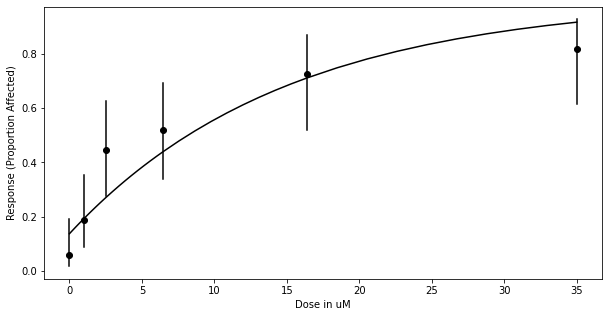

In [162]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

fig = plt.figure(figsize = (10, 5))

# Add points 
plt.scatter(to_model["conc"], to_model["bmdrc.frac.affected"], color = "black")

# Add curve
plt.plot(curve["Dose in uM"], curve["Response"], color = "black")

# Add confidence intervals
for row in range(len(to_model)):
    plt.plot([to_model["conc"][row], to_model["conc"][row]], [to_model["Low"][row], to_model["High"][row]], color = "black")

# Add labels and make plot
plt.xlabel("Dose in uM")
plt.ylabel("Response (Proportion Affected)")
plt.show()


## Write Checks

In [56]:
# Subset down to the column with the AIC model fits 
AIC_df = Long.aic_df[Long.aic_df["bmdrc.Endpoint.ID"] == "3863 OTIC"].drop(columns = "bmdrc.Endpoint.ID")

# Extract the minimum value in the data.frame
min_val = AIC_df[["Logistic", "Gamma", "Weibull", "Log Logistic", "Probit", "Log Probit", "Multistage", "Quantal Linear"]].min(axis=1)


def get_col(sr):
    name=sr.idxmin()
    value = sr[name]
    return pd.Series([value, name])

AIC_df[['Min_val','Min_col']] = AIC_df[AIC_df.columns.tolist()].apply(lambda x : get_col(x), axis=1)
AIC_df


,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage,Quantal Linear,Min_val,Min_col
9,16.802419,18.863073,18.073081,NaN,NaN,inf,43.183659,16.308702,16.308702,Quantal Linear


In [54]:
AIC_df.columns.tolist()

['Logistic',
 'Gamma',
 'Weibull',
 'Log Logistic',
 'Probit',
 'Log Probit',
 'Multistage',
 'Quantal Linear']

True